In [1]:
import wikipediaapi

def get_wikipedia_page(page_name):
    user_agent = 'gpt2ft/1.0 (ljcpro@outlook.com)'  # Replace with your app name and email
    wiki_wiki = wikipediaapi.Wikipedia('en', headers={'User-Agent': user_agent})
    page = wiki_wiki.page(page_name)
    if page.exists():
        return page.text
    else:
        raise ValueError("Page does not exist")

page_name = "Natural language processing"
wiki_text = get_wikipedia_page(page_name)
print(wiki_text[:1000])  # Print first 1000 characters for verification


Natural language processing (NLP) is an interdisciplinary subfield of computer science and artificial intelligence. It is primarily concerned with providing computers the ability to process data encoded in natural language and is thus closely related to information retrieval, knowledge representation and computational linguistics, a subfield of linguistics. Typically data is collected in text corpora, using either rule-based, statistical or neural-based approaches of machine learning and deep learning.
Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation.

History
Natural language processing has its roots in the 1940s. Already in 1940, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. 

In [2]:
with open("wiki_text.txt", "w", encoding="utf-8") as f:
    f.write(wiki_text)


In [3]:
import os
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

# Load the tokenizer and model
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Prepare the dataset
def load_dataset(file_path, tokenizer, block_size=128):
    dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size
    )
    return dataset

file_path = "wiki_text.txt"
dataset = load_dataset(file_path, tokenizer)

# Data collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

# Training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-wiki-finetuned",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=2,
    save_steps=10_000,
    save_total_limit=2,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)

# Fine-tune the model
trainer.train()

# Save the model
trainer.save_model("./gpt2-wiki-finetuned")
tokenizer.save_pretrained("./gpt2-wiki-finetuned")


/home/ljc/miniconda3/envs/fw/lib/python3.11/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ljcpro (alps-lab-sok). Use `wandb login --relogin` to force relogin


/home/ljc/miniconda3/envs/fw/lib/python3.11/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss


('./gpt2-wiki-finetuned/tokenizer_config.json',
 './gpt2-wiki-finetuned/special_tokens_map.json',
 './gpt2-wiki-finetuned/vocab.json',
 './gpt2-wiki-finetuned/merges.txt',
 './gpt2-wiki-finetuned/added_tokens.json')

In [11]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# 加载保存的模型和分词器
checkpoint_path = "./gpt2-wiki-finetuned"
tokenizer = GPT2Tokenizer.from_pretrained(checkpoint_path)
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

# 设置模型为评估模式
model.eval()

def generate_text(prompt, max_length=100, num_return_sequences=1):
    # 编码输入文本
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    
    # 生成文本
    with torch.no_grad():
        outputs = model.generate(
            input_ids=input_ids,
            max_length=max_length,
            num_return_sequences=num_return_sequences,
            no_repeat_ngram_size=2,
            early_stopping=True
        )
    
    # 解码生成的文本
    generated_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
    return generated_texts

# 示例：生成文本
prompt = "Natural language processing has its roots in the 1940s."
generated_texts = generate_text(prompt, max_length=200, num_return_sequences=1)

for i, text in enumerate(generated_texts):
    print(f"Generated Text {i+1}:\n{text}\n")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text 1:
Natural language processing has its roots in the 1940s. In the early 1990s, computer scientists began to develop a new approach to machine translation, which involved translating words into English.

In the 1990's, the field of machine learning began gaining momentum. The first major breakthrough came in 2003, when researchers at the University of California, Berkeley, developed a machine-learning algorithm that could learn words from a corpus of text. This algorithm, called the "Deep Learning Challenge," was developed by researchers from the Carnegie Mellon University and the National Institute of Standards and Technology (NIST).
The challenge was to identify the most common words in a given corpus, and then identify which words were most likely to be used in that corpus. For example, a word might be a noun, or a verb, for example. A word's meaning is determined by its meaning in its context, such as in English, French, German, Italian, Japanese, Korean, Chinese, etc

In [12]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# 加载保存的模型和分词器

model_name = "gpt2"
model_ori = GPT2LMHeadModel.from_pretrained(model_name)
# 设置模型为评估模式
model_ori.eval()

def generate_text(prompt, max_length=100, num_return_sequences=1):
    # 编码输入文本
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    
    # 生成文本
    with torch.no_grad():
        outputs = model_ori.generate(
            input_ids=input_ids,
            max_length=max_length,
            num_return_sequences=num_return_sequences,
            no_repeat_ngram_size=2,
            early_stopping=True
        )
    
    # 解码生成的文本
    generated_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
    return generated_texts

# 示例：生成文本
prompt = "Natural language processing has its roots in the 1940s."
generated_texts = generate_text(prompt, max_length=200, num_return_sequences=1)

for i, text in enumerate(generated_texts):
    print(f"Generated Text {i+1}:\n{text}\n")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text 1:
Natural language processing has its roots in the 1940s. In the early 1950s, the Japanese government began to develop a system of language-processing programs that allowed Japanese citizens to learn Japanese. The program was called the "Korean Language Processing Program," and it was designed to help Japanese people learn English.

The program, which was developed by the National Institute of Standards and Technology, was a major breakthrough in Japanese language learning. It allowed people to study Japanese and learn the language in a way that was not possible before. This was the first time that Japanese speakers could learn a language without having to speak it. Japanese was also the only language that could be taught in school. By the 1960s and 1970s Japanese had become a popular language for students in Japan. Today, Japanese is the second-most spoken language of the world, behind only English, and the number of people who speak Japanese has increased by more than

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


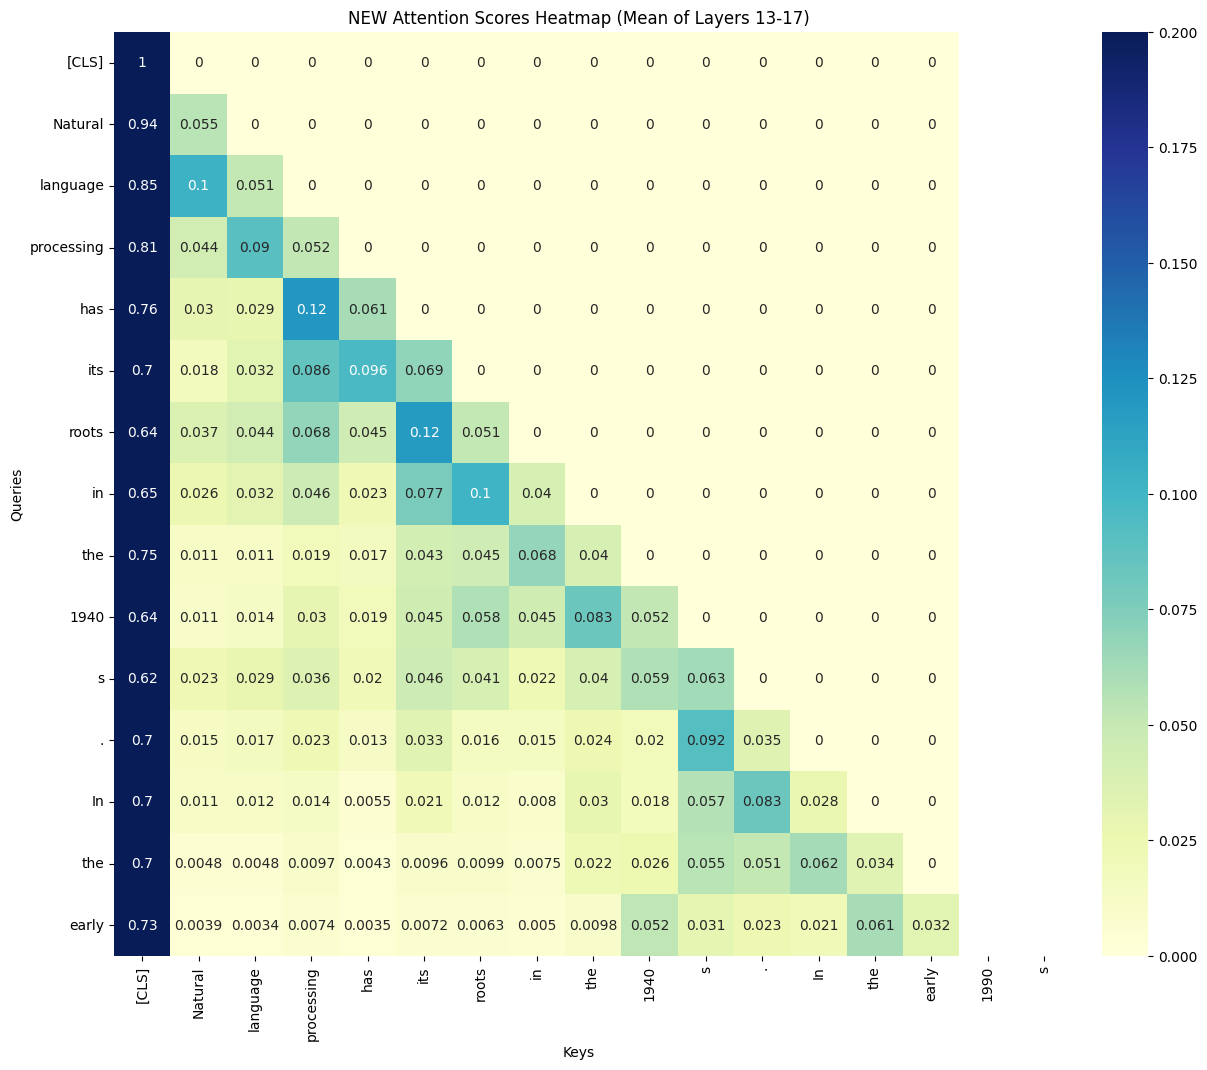

In [28]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import seaborn as sns
# 输入文本
input_text = "Natural language processing has its roots in the 1940s."

# 将输入文本编码为 token
inputs = tokenizer(input_text, return_tensors="pt")

# 生成新 token
generate_output = model.generate(inputs['input_ids'], max_length=inputs['input_ids'].shape[1] + 5, output_attentions=True, return_dict_in_generate=True)

# 获取生成的所有 token 的注意力值
attentions = generate_output.attentions  # 这是一个包含所有生成步骤的注意力值的元组
generated_ids = generate_output.sequences[0]  # 获取生成的 token 序列

# 获取所有 token 标签
tokens = tokenizer.convert_ids_to_tokens(generated_ids)
tokens = [token.replace('Ġ', '') for token in tokens]
tokens.insert(0, '[CLS]')
# 选择第 13 到第 17 层的索引
selected_layers = range(4, 8)  # Python 索引从 0 开始，第 13 层索引为 12，第 17 层索引为 16

# 初始化一个矩阵来存储所选层的注意力值的均值
all_attention = []
max_seq_length = max([step[0][0][0].shape[-1] for step in attentions])

for step in attentions:
    layer_attention = []
    for layer_index in selected_layers:
        attn = step[layer_index][0].detach().cpu().numpy()  # 形状 (num_heads, sequence_length, sequence_length)
        attn = attn.mean(axis=0)  # 对所有注意力头取均值，形状 (sequence_length, sequence_length)
        pad_width = max_seq_length - attn.shape[-1]
        if pad_width > 0:
            attn = np.pad(attn, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
        layer_attention.append(attn)
    # 对所选层的注意力值取均值
    mean_layer_attention = np.mean(layer_attention, axis=0)
    all_attention.append(mean_layer_attention)

# 将注意力值拼接成一个完整的矩阵
complete_attention = np.concatenate(all_attention, axis=0)

# 创建热力图
plt.figure(figsize=(15, 12))
sns.heatmap(complete_attention, annot=True, cmap='YlGnBu', xticklabels=tokens, yticklabels=tokens[:complete_attention.shape[0]], vmin=0, vmax=0.2)
plt.title('NEW Attention Scores Heatmap (Mean of Layers 13-17)')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.show()


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


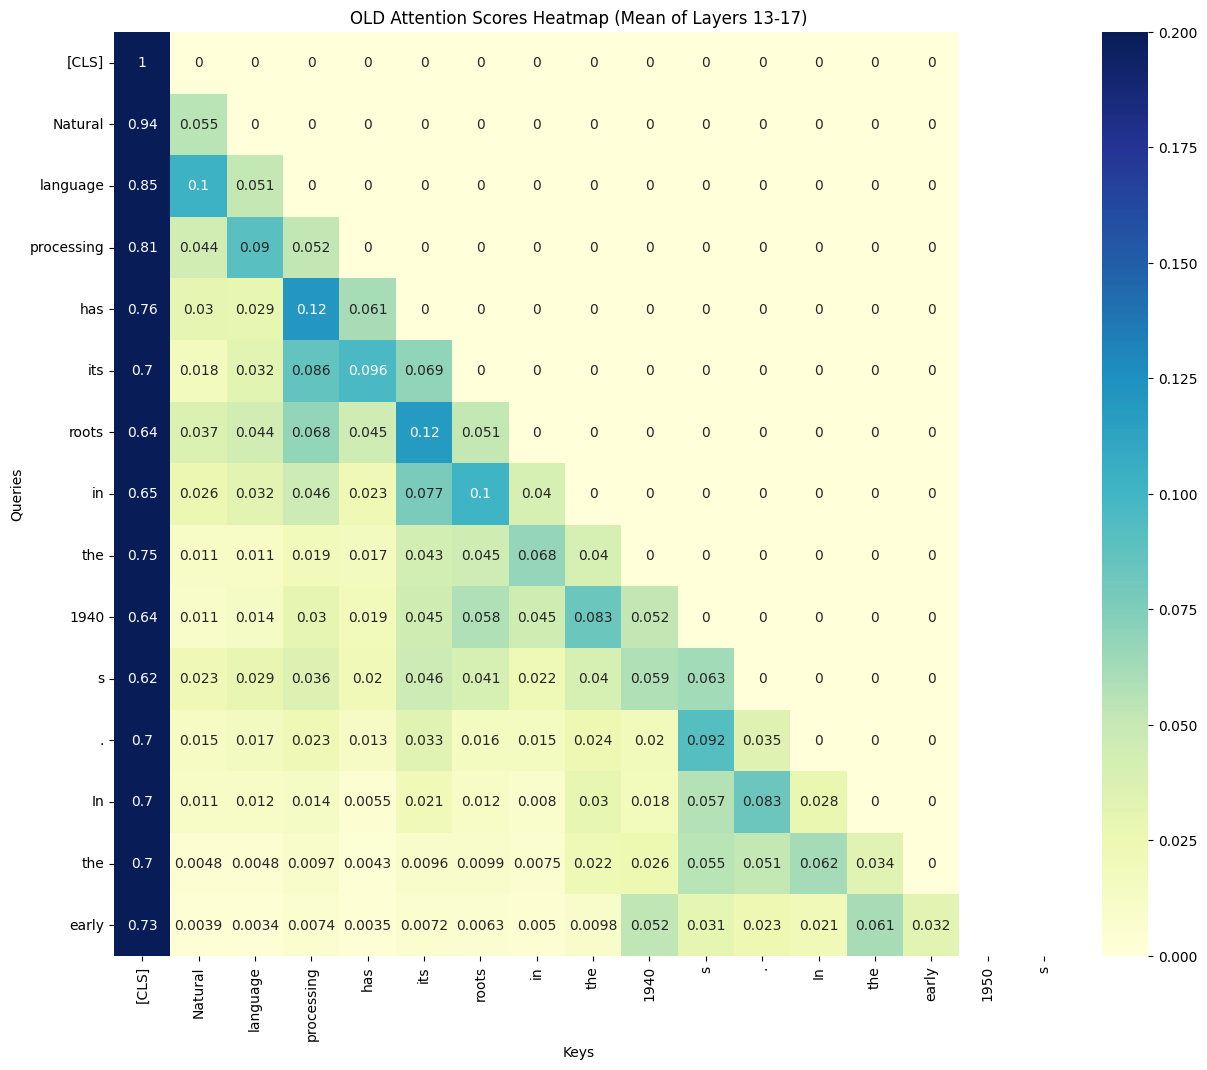

In [27]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import seaborn as sns
# 输入文本
input_text = "Natural language processing has its roots in the 1940s."

# 将输入文本编码为 token
inputs = tokenizer(input_text, return_tensors="pt")

# 生成新 token
generate_output = model_ori.generate(inputs['input_ids'], max_length=inputs['input_ids'].shape[1] + 5, output_attentions=True, return_dict_in_generate=True)

# 获取生成的所有 token 的注意力值
attentions = generate_output.attentions  # 这是一个包含所有生成步骤的注意力值的元组
generated_ids = generate_output.sequences[0]  # 获取生成的 token 序列

# 获取所有 token 标签
tokens = tokenizer.convert_ids_to_tokens(generated_ids)
tokens = [token.replace('Ġ', '') for token in tokens]
tokens.insert(0, '[CLS]')
# 选择第 13 到第 17 层的索引
selected_layers = range(4, 8)  # Python 索引从 0 开始，第 13 层索引为 12，第 17 层索引为 16

# 初始化一个矩阵来存储所选层的注意力值的均值
all_attention = []
max_seq_length = max([step[0][0][0].shape[-1] for step in attentions])

for step in attentions:
    layer_attention = []
    for layer_index in selected_layers:
        attn = step[layer_index][0].detach().cpu().numpy()  # 形状 (num_heads, sequence_length, sequence_length)
        attn = attn.mean(axis=0)  # 对所有注意力头取均值，形状 (sequence_length, sequence_length)
        pad_width = max_seq_length - attn.shape[-1]
        if pad_width > 0:
            attn = np.pad(attn, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
        layer_attention.append(attn)
    # 对所选层的注意力值取均值
    mean_layer_attention = np.mean(layer_attention, axis=0)
    all_attention.append(mean_layer_attention)

# 将注意力值拼接成一个完整的矩阵
complete_attention_ori = np.concatenate(all_attention, axis=0)

# 创建热力图
plt.figure(figsize=(15, 12))
sns.heatmap(complete_attention, annot=True, cmap='YlGnBu', xticklabels=tokens, yticklabels=tokens[:complete_attention_ori.shape[0]], vmin=0, vmax=0.2)
plt.title('OLD Attention Scores Heatmap (Mean of Layers 13-17)')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.show()


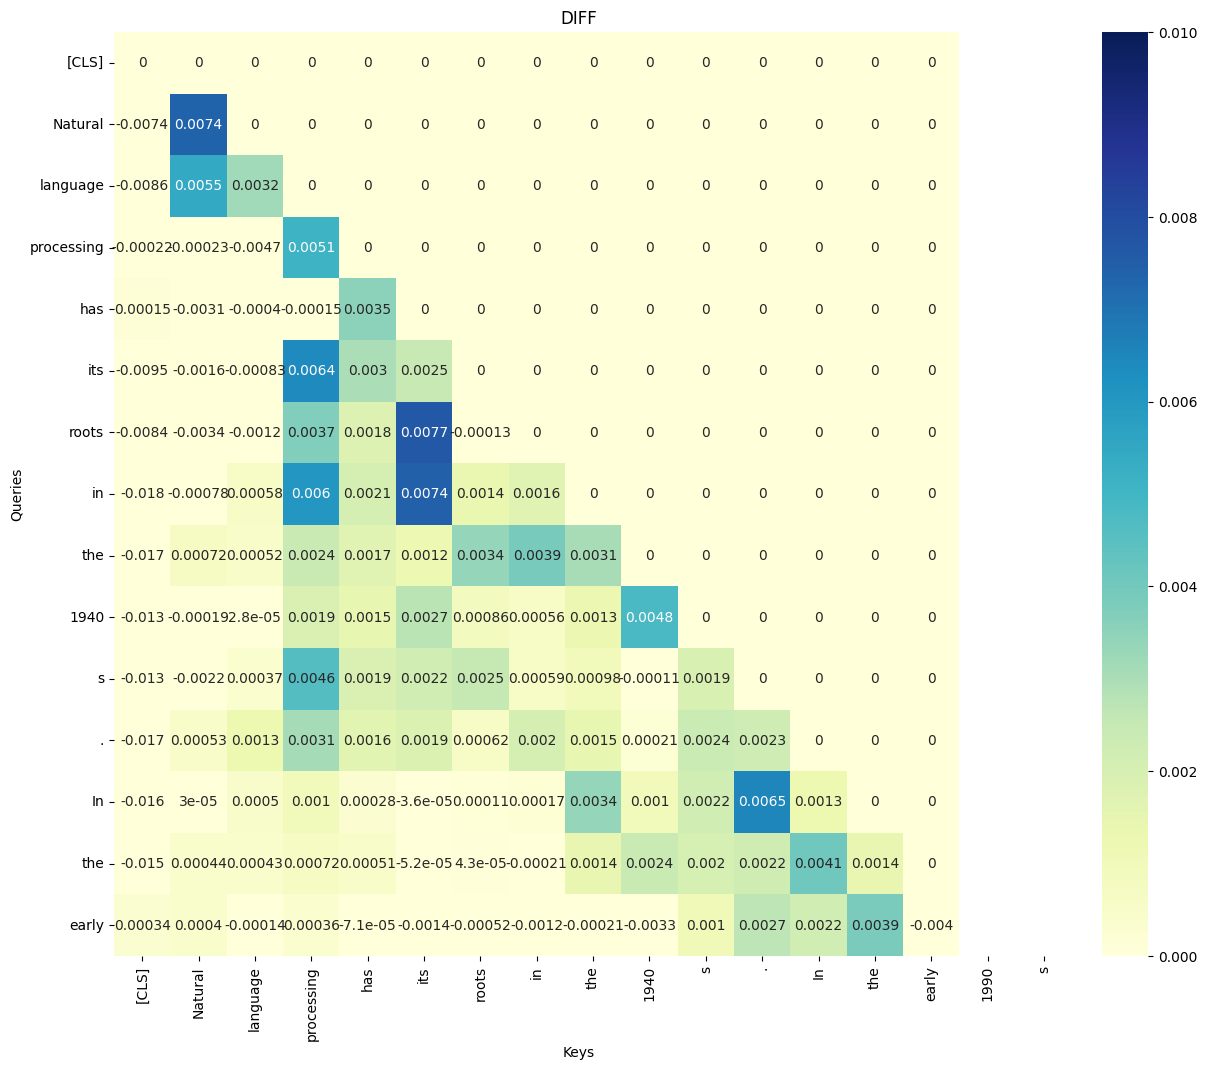

In [31]:
# 创建热力图
plt.figure(figsize=(15, 12))
sns.heatmap(complete_attention-complete_attention_ori, annot=True, cmap='YlGnBu', xticklabels=tokens, yticklabels=tokens[:complete_attention_ori.shape[0]], vmin=0, vmax=0.01)
plt.title('DIFF')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.show()